# Imports for the application

In [2]:
import plotly.graph_objects as go
import pyproj
import rasterio
from rasterio.plot import show
from rasterio.windows import from_bounds
%matplotlib inline

## Reading the data

In [3]:
data = rasterio.open("DHMVIIDSMRAS1m_k13.tif")

### Longitude

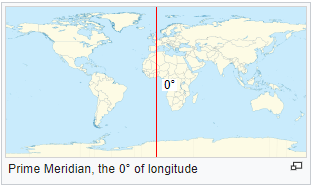

## Latitude

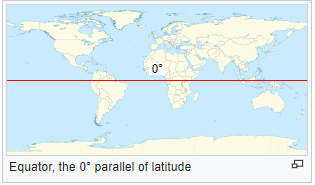

### Asking for inputs

In [4]:
Longitude = float(input('North coordinate in decimal degree: '))#51.208833
Latitude = float(input('East coordinate in decimal degree: '))#3.224316

North coordinate in decimal degree: 51.208833
East coordinate in decimal degree: 3.224316


### Conversion of one CRS to another

In [5]:
transformer = pyproj.Transformer.from_crs('epsg:4326', 'epsg:31370')
#long,lat = transformer.transform(51.208833, 3.224316)
long, lat=transformer.transform(Longitude,Latitude)

In [6]:
long

70025.90002837367

In [7]:
lat

211601.36064859293

## Way to convert DMS(Degree,Minute,Second) to DD(Decimal Degree)

In [9]:
north_D = float(input("Give me your North's degree  "))
north_M= float(input("Give me your North's Minute  "))
north_S= float(input("Give me your North's second  "))
print('North => ', north_D,'°',north_M,"'",north_S,'\"')
east_D=float(input("Give me your East's degree "))
east_M=float(input("Give me your East's Minute "))
east_S=float(input("Give me your East's second "))

print('East => ', east_D,'°',east_M,"'",east_S,'\"')
longitude= north_D + (north_M/60) + (north_S/3600)
latitude = east_D + (east_M/60) + (east_S/3600)
print('Longitude in DD > ',"%.5f" % longitude,'°','   ','Latitude in DD > ', "%.5f" % latitude,'°' )

Give me your North's degree  51
Give me your North's Minute  12
Give me your North's second  34.1
North =>  51.0 ° 12.0 ' 34.1 "
Give me your East's degree 3
Give me your East's Minute 13
Give me your East's second 22.5
East =>  3.0 ° 13.0 ' 22.5 "
Longitude in DD >  51.20947 °     Latitude in DD >  3.22292 °


In [14]:
left = long - 100
right = long + 100
bottom = lat - 100
top = lat + 10
location = data.read(1, window=from_bounds(left,bottom,right,top,data.transform))
fig = go.Figure(data=[go.Surface(z=location)])
fig.update_layout(title='Brugge', scene=dict(aspectmode='data', aspectratio=dict(x=1,y=1.2,z=1),xaxis_showspikes=False,
                             yaxis_showspikes=False ))
fig.show()